# Cat Boost Model

## Einleitung
quelle: https://github.com/llSourcell/Kaggle_Earthquake_challenge/blob/master/Earthquake_Challenge.ipynb

- Yandex is Russian Google
- Yandex uses "gradient boosting" a lot to power their services (music streaming, search, everything really)
- Gradient boosting on decision trees is a form of machine learning that works by progressively training more complex models to maximize the accuracy of predictions. 
- It's particularly useful for predictive models that analyze ordered (continuous) data and categorical data. 
- It's  one of the most efficient ways to build ensemble models. The combination of gradient boosting with decision trees provides state-of-the-art results in many applications with structured data.
- On the first iteration, the algorithm learns the first tree to reduce the training error, shown on left-hand image in figure 1. 
- This model usually has a significant error; it’s not a good idea to build very big trees in boosting since they overfit the data.
- The right-hand image in figure 1 shows the second iteration, in which the algorithm learns one more tree to reduce the error made by the first tree. 
- The algorithm repeats this procedure until it builds a decent quality model

![alt text](https://devblogs.nvidia.com/wp-content/uploads/2018/12/first-second-trees-625x357.png)


- Gradient Boosting is a way to implement this idea for any continuous objective function. 

### Each step of Gradient Boosting combines two steps:

- Step 1 - Computing gradients of the loss function we want to optimize for each input object
- Step 2 - Learning the decision tree which predicts gradients of the loss function

In [1]:
import pandas as pd
import numpy as np
#data visualization
import matplotlib.pyplot as plt
import librosa
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from scipy.stats import kurtosis
from scipy.stats import skew

import seaborn as sns

%matplotlib inline

pd.options.display.precision = 10

## Umgebungsvariablen

In [2]:
#feature generated 24.03.2019
earthquake_daten = '''C:/studium/studium/CAS_PML/Projekt_Arbeit/earthquake/Daten/earthquake_data/'''
feature_62900_94 = 'Features_62900-94.csv'
feature_41934_94 = 'Features_41934_94.csv'
Features_4194_94 = 'Features_4194_94.csv'

# Feature laden

In [44]:
train_data = pd.read_csv(earthquake_daten+feature_41934_94)
train_data = shuffle(train_data, random_state=10)

feature_data = train_data.iloc[:,1:95]
time_to_failure = np.array(train_data.iloc[:,-1])

# Feature Analyse

In [6]:
feature_data.describe()

,mean,std,kurt,skew,min,max,1%q,5%q,25%q,75%q,...,spec_bw_kurt,spec_bw_skew,spec_bw_min,spec_bw_max,spec_bw_1%q,spec_bw_5%q,spec_bw_25%q,spec_bw_75%q,spec_bw_95%q,spec_bw_99%q
count,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,...,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000
mean,4.5194207052,6.5494624189,68.3416967641,0.1252057914,-149.3662421901,163.5435923117,-11.2148137549,-2.1890232270,2.2010421138,6.8627605284,...,12.7896841680,-3.1091462491,369580.5488563732,593198.4810650084,417744.4385657278,494608.3722114560,557027.9247439427,578274.0256393899,585354.5354653193,589786.5755651240
std,0.2561034062,8.5039199502,71.5176395737,0.4860815241,266.0096389602,273.7562474249,13.9049955344,2.3700049793,0.5032592236,0.4770053315,...,8.8255001353,0.9061073529,61468.9499724829,3214.8826617986,54932.2573563383,39380.1691725670,15881.1905858769,3704.6218152966,2555.3326193667,2535.7152379601
min,3.5550933333,2.7902372255,0.4321284600,-5.5187945968,-5515.0000000000,23.0000000000,-336.0000000000,-45.0000000000,-3.0000000000,6.0000000000,...,-0.6192454506,-8.7072632508,113489.2027425448,573419.4385050547,122976.6220800366,227892.0518402591,359230.6531110291,517037.1742718818,560509.7559190223,569021.1015906825
25%,4.3517900000,4.4668115189,27.9845548999,-0.0386432786,-155.0000000000,91.0000000000,-14.0000000000,-3.0000000000,2.0000000000,7.0000000000,...,6.9416282271,-3.5548990084,333638.5920621625,591018.0025069662,385736.5493826763,470430.9756211616,549252.2569360731,576065.4411271894,583652.6131847689,588076.5654180326
50%,4.5227633333,5.5939956838,45.5524253052,0.0862328996,-110.0000000000,123.0000000000,-10.0000000000,-2.0000000000,2.0000000000,7.0000000000,...,10.3237286827,-2.9292740624,371274.4264139568,593052.8389875928,419016.2559842028,495585.3611684506,558842.0486257107,578318.5132638491,585350.7299477484,589803.3499884446
75%,4.6929233333,6.8833228272,79.4815017187,0.2564331411,-79.0000000000,170.0000000000,-6.0000000000,-1.0000000000,2.0000000000,7.0000000000,...,15.7958301660,-2.4763579426,410187.1897359705,595212.2423848667,454506.5164036062,523288.3531488007,568587.5202436801,580908.6034652712,587196.4704127871,591519.5543170404
max,5.4638133333,153.7066214235,1986.1592309807,10.5922843032,-15.0000000000,5444.0000000000,-2.0000000000,1.0000000000,3.0000000000,12.0000000000,...,84.4776390813,-0.7233254603,552562.8899506893,613786.0689322522,560062.9325178112,570975.4734872296,578136.8393907149,586966.0075451231,592806.6277031272,598756.1276749838


# Model Workbench

## Imports

In [3]:
# Scaler


# Model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Modell
from catboost import CatBoostRegressor, Pool, EFstrType,cv

Quelle: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [4]:
def getMostImportendFeatuers(feat_imp, topAmount):
    '''Gibt die wichtigsten Features zurück. Wird benötigt, um die Trainingsdaten und Testdaten 
    anhand Featuers zu filtern.'''
    i = 0
    featureFilter = list()
    for feature in feat_imp:
        featureFilter.append(feature)
        i +=1
        if i >= topAmount:
            break
    return featureFilter

In [5]:
def modelfit(alg, dtrain, time_to_failure, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain, time_to_failure)
      
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)

    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain, time_to_failure, cv=cv_folds, scoring='neg_mean_absolute_error',n_jobs=-1)
    
    #Print model report:
    print("\nModel Report")
    print("MAE train data: %.4g" % mean_absolute_error(time_to_failure, dtrain_predictions)) 
    
    if performCV:
        print("CV Score MAE: \nMean %.7g \nStd %.7g \nMin %.7g \nMax %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, dtrain.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances',figsize=(15,10))
        plt.ylabel('Feature Importance Score')
        plt.show()
        print('Top 94 Feature')
        print(getMostImportendFeatuers(feat_imp.index,94))

In [6]:
def test_Model_with_62900_test_train_split(model,feature_filter=['spec_cent_75%q', 'mean', 'zero_crossings', 'skew', 'min', 'psd_kurt', 'spec_cent_min', 'kurt', 'chroma_stft_skew', 'spec_bw_skew', 'spec_cent_absMax', 'psd_25%q', 'spec_bw_99%q', 'psd_5%q', 'chroma_stft_75%q', '75%q', 'rolloff_max', 'spec_bw_max', 'chroma_stft_min', 'rms_25%q', 'rms_min', 'rms_5%q', 'psd_1%q', 'psd_min', '25%q', 'chroma_stft_5%q', 'rms_skew', 'rms_kurt', 'chroma_stft_99%q', 'chroma_stft_95%q', 'chroma_stft_max']):
    #load Features_62900
    train_data = pd.read_csv(earthquake_daten+feature_62900_94)
    train_data = shuffle(train_data, random_state=10)
    feature_data = train_data.iloc[:,1:95]
    time_to_failure = np.array(train_data.iloc[:,-1])

    filtered_feature = feature_data.filter(items=feature_filter)   

    X_train, X_test, y_train, y_test = train_test_split(filtered_feature, time_to_failure, test_size=0.20, random_state=42,shuffle=True)
    
    #fit model
    model.fit(X_train,y_train)
    
    #predict
    prediction = model.predict(X_test)
    
    print("MAE train / test data: %.4g" % mean_absolute_error(y_test, prediction)) 
    

In [7]:
def test_Model_with_41934_test_train_split(model,feature_filter=['spec_cent_75%q', 'mean', 'skew', 'zero_crossings', 'min', 'rolloff_75%q', 'max', 'spec_bw_75%q', 'absMax', 'spec_cent_95%q', 'spec_bw_25%q', 'spec_cent_min', 'psd_kurt', 'psd_skew', 'rolloff_95%q', 'psd_75%q', 'chroma_stft_std', 'chroma_stft_mean', 'rolloff_min', 'kurt']):
    #load 41934
    train_data = pd.read_csv(earthquake_daten+feature_41934_94)
    train_data = shuffle(train_data, random_state=10)
    feature_data = train_data.iloc[:,1:95]
    time_to_failure = np.array(train_data.iloc[:,-1])

    filtered_feature = feature_data.filter(items=feature_filter)   

    X_train, X_test, y_train, y_test = train_test_split(filtered_feature, time_to_failure, test_size=0.20, random_state=42,shuffle=True)
    
    #fit model
    model.fit(X_train,y_train)
    
    #predict
    prediction = model.predict(X_test)
    
    print("MAE train / test data: %.4g" % mean_absolute_error(y_test, prediction)) 

In [8]:
#quelle: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(10,5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Anzahl Trainingsdatensätze")
    plt.ylabel("Score neg_mean_absolute_error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring='neg_mean_absolute_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


# Baseline 94 Feature


Model Report
MAE train data: 1.752
CV Score MAE: 
Mean -1.829114 
Std 0.009037058 
Min -1.846324 
Max -1.820009


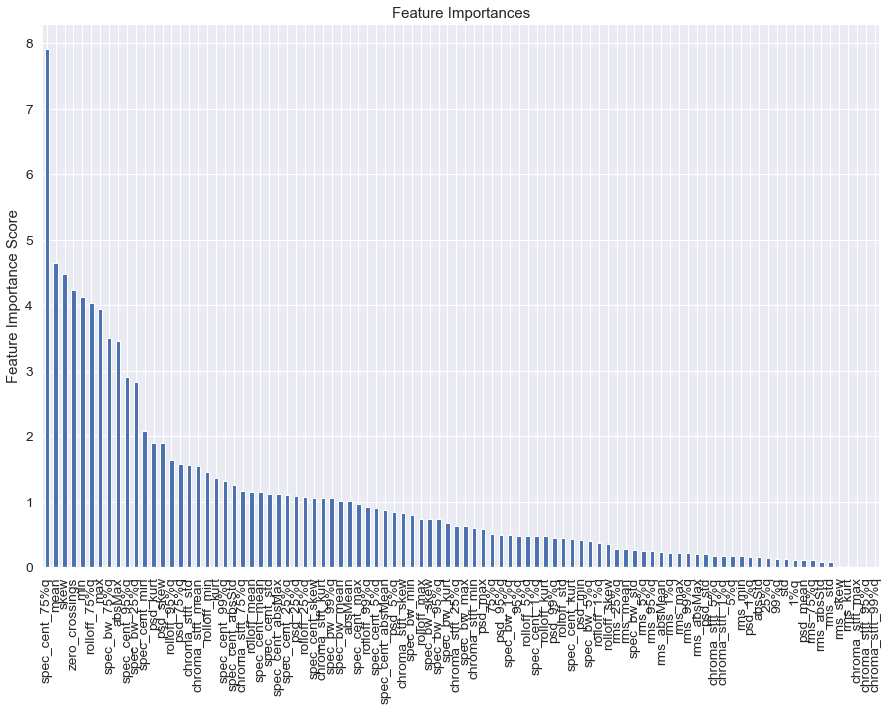

Top 94 Feature
['spec_cent_75%q', 'mean', 'skew', 'zero_crossings', 'min', 'rolloff_75%q', 'max', 'spec_bw_75%q', 'absMax', 'spec_cent_95%q', 'spec_bw_25%q', 'spec_cent_min', 'psd_kurt', 'psd_skew', 'rolloff_95%q', 'psd_75%q', 'chroma_stft_std', 'chroma_stft_mean', 'rolloff_min', 'kurt', 'spec_cent_99%q', 'spec_cent_absStd', 'chroma_stft_75%q', 'rolloff_mean', 'spec_cent_mean', 'spec_cent_std', 'spec_cent_absMax', 'spec_cent_25%q', 'psd_25%q', 'rolloff_25%q', 'spec_cent_skew', 'chroma_stft_kurt', 'spec_bw_99%q', 'spec_bw_mean', 'absMean', 'spec_cent_max', 'rolloff_99%q', 'spec_cent_5%q', 'spec_cent_absMean', 'psd_5%q', 'chroma_stft_skew', 'spec_bw_min', 'rolloff_max', 'spec_bw_skew', 'spec_bw_95%q', 'spec_bw_kurt', 'chroma_stft_25%q', 'spec_bw_max', 'chroma_stft_min', 'psd_max', '75%q', 'psd_95%q', 'spec_bw_1%q', '95%q', 'rolloff_5%q', 'spec_cent_1%q', 'rolloff_kurt', 'psd_99%q', 'rolloff_std', 'spec_cent_kurt', 'psd_min', 'spec_bw_5%q', 'rolloff_1%q', 'rolloff_skew', 'rms_25%q', 'rms_

In [22]:
gbm0 = CatBoostRegressor(random_state=10, verbose = False)
modelfit(gbm0, feature_data, time_to_failure)

## Baseline 94 Feature

In [48]:
gbm0 = CatBoostRegressor( random_state=10, verbose = False)
filter_ =['spec_cent_75%q', 'mean', 'rolloff_75%q', 'zero_crossings', 'spec_cent_95%q', 'skew', 'min', 'absMax', 'spec_bw_75%q', 'spec_cent_mean', 'max', 'spec_bw_25%q', 'spec_cent_std', 'psd_kurt', 'rolloff_25%q', 'spec_cent_absMean', 'psd_skew', 'spec_cent_min', 'spec_cent_absStd', 'rolloff_95%q', 'kurt', 'psd_75%q', 'rolloff_min', 'chroma_stft_mean', 'chroma_stft_std', 'rolloff_99%q', 'spec_cent_skew', 'spec_cent_25%q', 'spec_cent_max', 'spec_cent_99%q', 'chroma_stft_skew', 'spec_bw_skew', 'spec_cent_5%q', 'absMean', 'spec_cent_absMax', 'spec_cent_kurt', 'psd_25%q', 'spec_bw_min', 'chroma_stft_kurt', 'spec_bw_99%q', 'psd_95%q', 'spec_bw_kurt', 'spec_bw_95%q', 'psd_5%q', 'chroma_stft_25%q', 'spec_cent_1%q', 'rolloff_mean', 'chroma_stft_75%q', 'rolloff_kurt', '75%q', 'psd_max', 'rolloff_skew', 'rolloff_std', 'rolloff_max', 'spec_bw_1%q', 'spec_bw_5%q', 'psd_99%q', 'spec_bw_mean', 'spec_bw_std', 'spec_bw_max', 'rolloff_5%q', 'chroma_stft_min', 'rms_mean', 'rms_99%q', 'rms_absMax', 'rolloff_1%q', 'rms_absMean', '1%q', 'rms_25%q', 'rms_min', 'rms_1%q', 'psd_std', 'rms_95%q', '5%q', 'rms_5%q', 'std', '95%q', 'absStd', 'rms_max', 'psd_mean', '99%q', 'psd_1%q', 'psd_min', 'rms_75%q', '25%q', 'rms_std', 'chroma_stft_5%q', 'chroma_stft_1%q', 'rms_skew', 'rms_kurt', 'rms_absStd', 'chroma_stft_99%q', 'chroma_stft_95%q', 'chroma_stft_max']

test_Model_with_62900_test_train_split(gbm0,filter_)

MAE train / test data: 1.823


## Feature Interaction

In [97]:
interactions = gbm0.get_feature_importance(Pool(feature_data,time_to_failure),fstr_type=EFstrType.Interaction, prettified=True)

In [20]:
feature_interaction_df = pd.DataFrame(columns=['feature1', 'feature2', 'interaction_strength'])
for interaction in interactions:
    print(interaction)
    n = list()
    n.append(interaction[0])
    n.append(interaction[1])
    n.append(interaction[2])
    feature_interaction_df = feature_interaction_df.append(n)




NameError: name 'interactions' is not defined

# Model with 20 most importent Features

### Filter Feature
Anhand Feature importence (siehe oben)

In [24]:
# Erhalten aus dem Notebook Model_CatBoost_94
items_to_filter = ['spec_cent_75%q', 'mean', 'rolloff_75%q', 'zero_crossings', 'spec_cent_95%q', 'skew', 'min', 'absMax', 'spec_bw_75%q', 'spec_cent_mean', 'max', 'spec_bw_25%q', 'spec_cent_std', 'psd_kurt', 'rolloff_25%q', 'spec_cent_absMean', 'psd_skew', 'spec_cent_min', 'spec_cent_absStd', 'rolloff_95%q']
filtered_feature_data = feature_data.filter(items=items_to_filter)                 

## Feature Analyse

In [15]:
filtered_feature_data.describe()

,spec_cent_75%q,mean,rolloff_75%q,zero_crossings,spec_cent_95%q,skew,min,absMax,spec_bw_75%q,spec_cent_mean,max,spec_bw_25%q,spec_cent_std,psd_kurt,rolloff_25%q,spec_cent_absMean,psd_skew,spec_cent_min,spec_cent_absStd,rolloff_95%q
count,41934.0000000000,41934.0000000000,4.1934000000e+04,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,4.1934000000e+04,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,4.1934000000e+04
mean,742387.2523088438,4.5194207052,1.4689638778e+06,12364.2003386274,766501.4226891467,0.1252057914,-149.3662421901,170.2135260171,578274.0256393899,684110.7118206162,163.5435923117,557027.9247439427,84680.0669979103,21.3592964286,1.3654761519e+06,684110.7118206162,4.3532761010,344798.2757470835,84680.0669979103,1.4987589780e+06
std,20776.6077719682,0.2561034062,2.0638896524e+04,2350.7020123311,12738.7647896970,0.4860815241,266.0096389602,297.8494453362,3704.6218152966,36963.9128289447,273.7562474249,15881.1905858769,17685.2075445529,7.5717075103,7.7640648481e+04,36963.9128289447,0.6992302210,62219.3811823401,17685.2075445529,1.3250882722e+04
min,539282.7949792275,3.5550933333,1.1894531250e+06,5124.0000000000,647020.8741038998,-5.5187945968,-5515.0000000000,23.0000000000,517037.1742718818,446696.5493540333,23.0000000000,359230.6531110291,24103.5421957797,3.9797691222,4.5117187500e+05,446696.5493540333,1.8558664322,163127.6009887653,24103.5421957797,1.3798828125e+06
25%,728775.4999623451,4.3517900000,1.4550781250e+06,10627.0000000000,757997.6752581031,-0.0386432786,-155.0000000000,93.0000000000,576065.4411271894,657968.3689988025,91.0000000000,549252.2569360731,73311.8920516433,15.8853275321,1.3242187500e+06,657968.3689988025,3.8615123630,302540.2457666902,73311.8920516433,1.4902343750e+06
50%,742654.9275670950,4.5227633333,1.4687500000e+06,12508.0000000000,766364.8596778678,0.0862328996,-110.0000000000,127.0000000000,578318.5132638491,681146.7455388771,123.0000000000,558842.0486257107,86503.1387702648,20.3492070936,1.3671875000e+06,681146.7455388771,4.2880156040,339053.1306224105,86503.1387702648,1.4980468750e+06
75%,758660.7690201603,4.6929233333,1.4843750000e+06,14132.0000000000,775932.4720382815,0.2564331411,-79.0000000000,175.0000000000,580908.6034652712,712748.7185540459,170.0000000000,568587.5202436801,96847.1908938453,25.4352391253,1.4218750000e+06,712748.7185540459,4.7566037178,381883.5144340553,96847.1908938453,1.5087890625e+06
max,787634.4965454257,5.4638133333,1.5097656250e+06,19956.0000000000,801471.0921077820,10.5922843032,-15.0000000000,5515.0000000000,586966.0075451231,767270.8528699529,5444.0000000000,578136.8393907149,179844.2450618852,70.4963456266,1.4765625000e+06,767270.8528699529,7.9966616631,633338.5852294917,179844.2450618852,1.5312500000e+06


### Verteilung der einzelnen Features

Text(0.5, 0.98, 'Feature Histogramm')

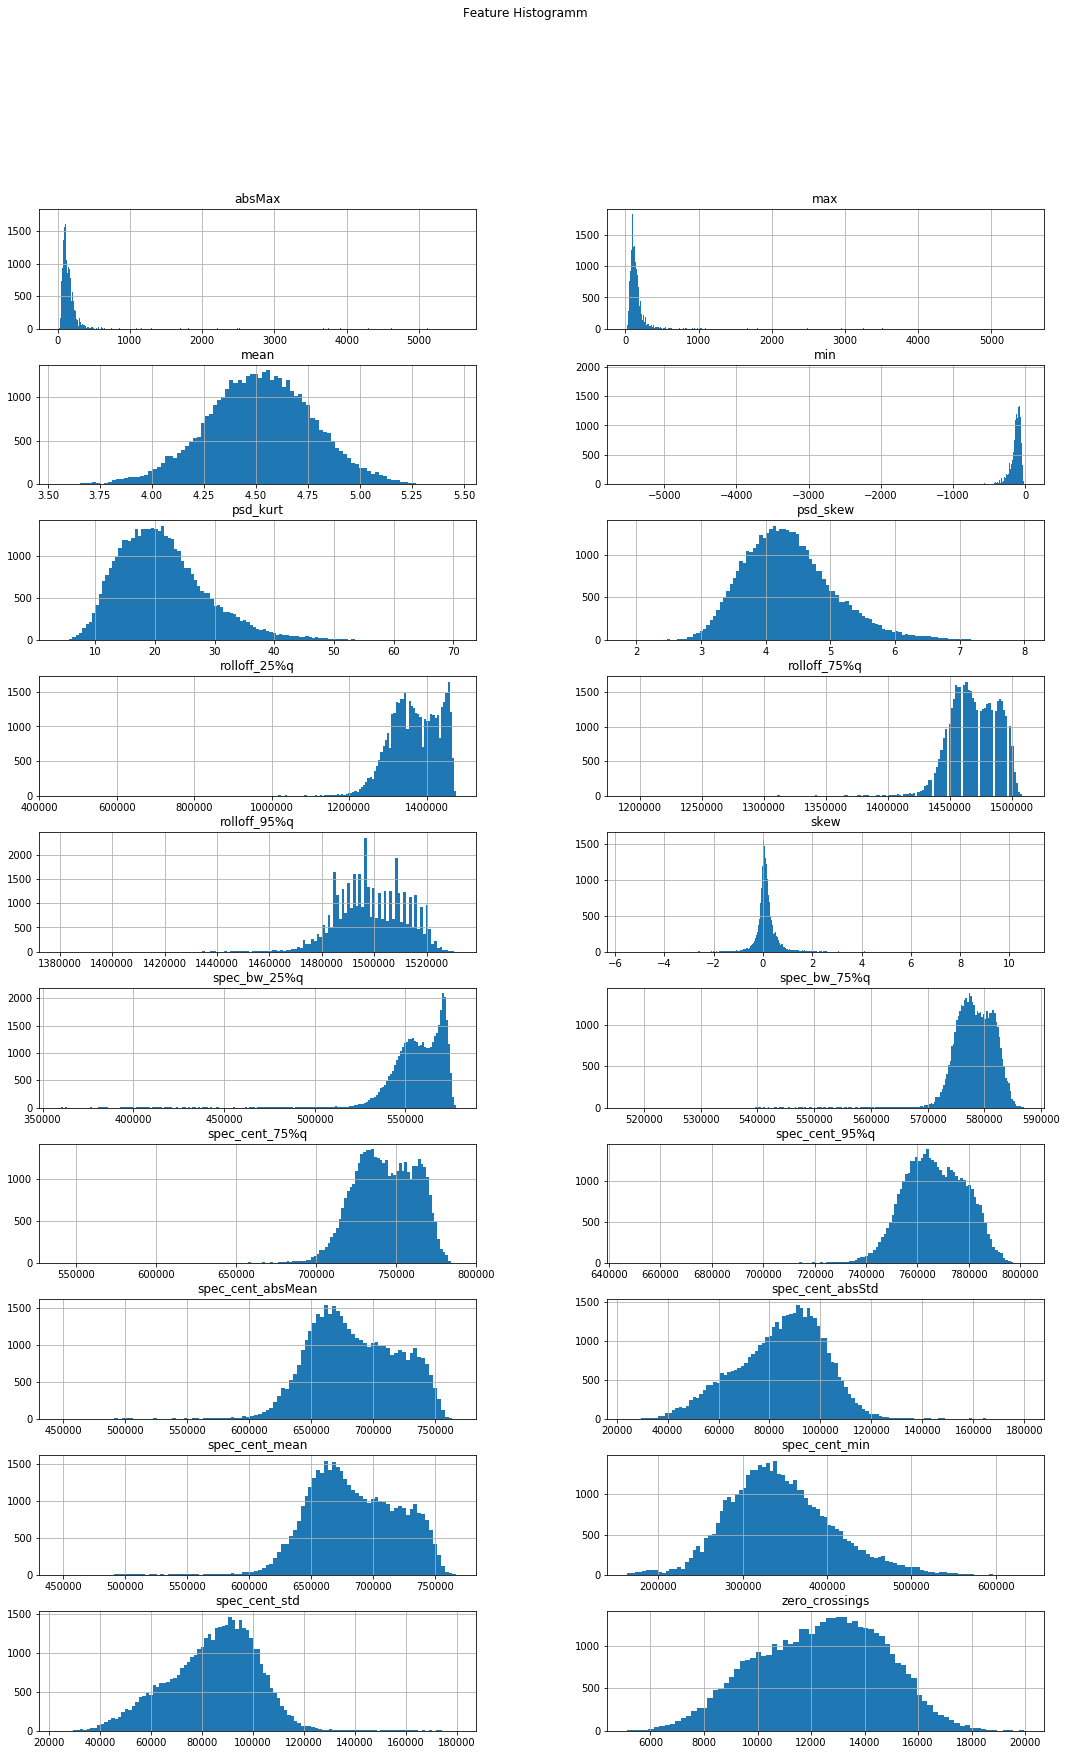

In [6]:
axes = filtered_feature_data.hist(bins='auto', figsize=(18, 28), layout=(10, 2))
plt.suptitle("Feature Histogramm")

In [45]:
feature_data.loc[:,'std'].describe()

count    41934.0000000000
mean         6.5494624189
std          8.5039199502
min          2.7902372255
25%          4.4668115189
50%          5.5939956838
75%          6.8833228272
max        153.7066214235
Name: std, dtype: float64

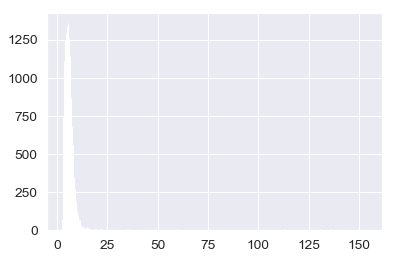

In [46]:
feature_data.loc[:,'std'].hist(bins='auto')

### Verteilung von Time_To_Failure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023073EFB940>]],
      dtype=object)

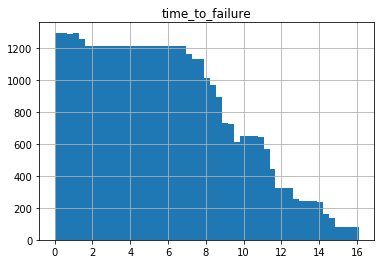

In [9]:
time_to_failure_df = pd.DataFrame(time_to_failure, columns=['time_to_failure'])
time_to_failure_df.hist(bins='auto')

### Korrelationen zwischen den Features (CatBoost)

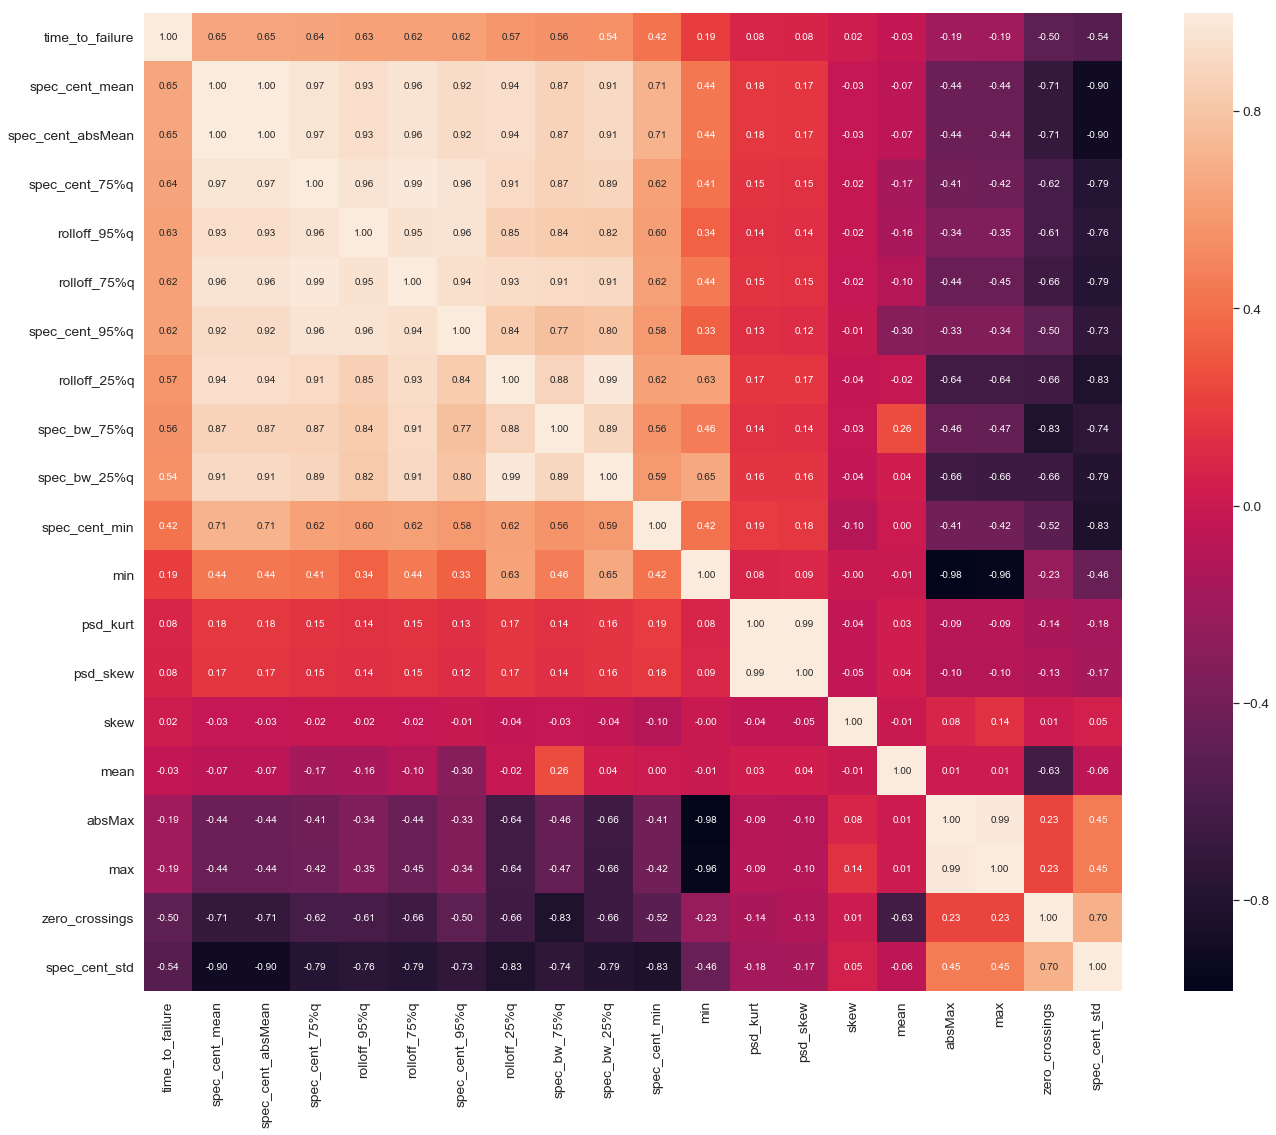

In [19]:
filtered_feature_data_corr = filtered_feature_data
filtered_feature_data_corr['time_to_failure'] = time_to_failure
corr = filtered_feature_data_corr.corr()

k = 20
plt.subplots(figsize=(22,18))
cols = corr.nlargest(k, 'time_to_failure')['time_to_failure'].index
cm = np.corrcoef(filtered_feature_data_corr[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Baseline 20 Feature / 41934 rows


Model Report
MAE train data: 1.8
CV Score MAE: 
Mean -1.879656 
Std 0.005817434 
Min -1.889791 
Max -1.872457


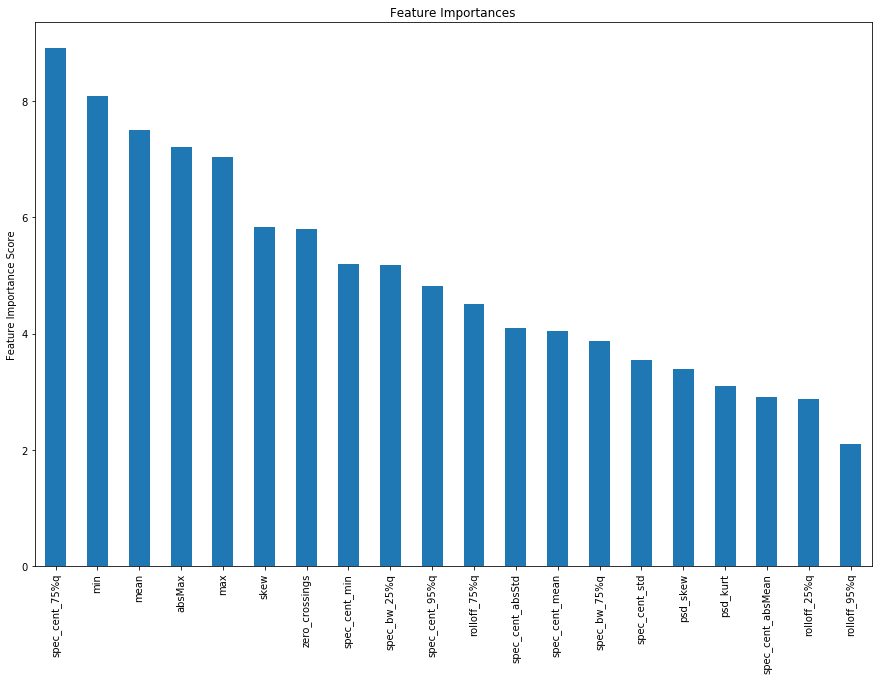

Top 20 Feature
['spec_cent_75%q', 'min', 'mean', 'absMax', 'max', 'skew', 'zero_crossings', 'spec_cent_min', 'spec_bw_25%q', 'spec_cent_95%q', 'rolloff_75%q', 'spec_cent_absStd', 'spec_cent_mean', 'spec_bw_75%q', 'spec_cent_std', 'psd_skew', 'psd_kurt', 'spec_cent_absMean', 'rolloff_25%q', 'rolloff_95%q']


In [14]:
gbm0 = CatBoostRegressor(random_state=10, verbose = False)
modelfit(gbm0, filtered_feature_data, time_to_failure)

## Baseline Train_Test_Split 41934

In [48]:
gbm0 = CatBoostRegressor(random_state=10, verbose = False)
test_Model_with_41934_test_train_split(gbm0)

MAE train / test data: 1.858


## Lernkurve Baseline

C:\Users\chianti\.conda\envs\TensorFlow-GPU-Keras\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\chianti\\.conda\\envs\\TensorFlow-GPU-Keras\\lib\\site-packages\\matplotlib\\pyplot.py'>

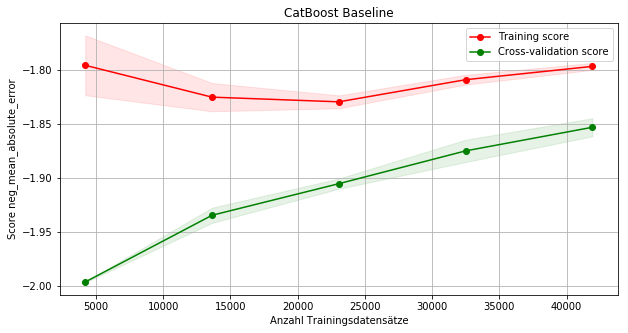

In [11]:
train_data = pd.read_csv(earthquake_daten+feature_62900_94)
train_data = shuffle(train_data, random_state=10)
feature_data = train_data.iloc[:,1:95]
time_to_failure = np.array(train_data.iloc[:,-1])

items_to_filter = ['spec_cent_75%q', 'min', 'mean', 'absMax', 'max', 'skew', 'zero_crossings', 'spec_cent_min', 'spec_bw_25%q', 'spec_cent_95%q', 'rolloff_75%q', 'spec_cent_absStd', 'spec_cent_mean', 'spec_bw_75%q', 'spec_cent_std', 'psd_skew', 'psd_kurt', 'spec_cent_absMean', 'rolloff_25%q', 'rolloff_95%q']
filtered_feature = feature_data.filter(items=items_to_filter)   

gbm0 = CatBoostRegressor(random_state=10, verbose = False)
plot_learning_curve(gbm0,'CatBoost Baseline',filtered_feature,time_to_failure)

## Loss function Analyse

In [ ]:
train_data = pd.read_csv(earthquake_daten+feature_41934_94)
train_data = shuffle(train_data, random_state=10)
feature_data = train_data.iloc[:,1:95]
time_to_failure = np.array(train_data.iloc[:,-1])

items_to_filter = ['spec_cent_75%q', 'min', 'mean', 'absMax', 'max', 'skew', 'zero_crossings', 'spec_cent_min', 'spec_bw_25%q', 'spec_cent_95%q', 'rolloff_75%q', 'spec_cent_absStd', 'spec_cent_mean', 'spec_bw_75%q', 'spec_cent_std', 'psd_skew', 'psd_kurt', 'spec_cent_absMean', 'rolloff_25%q', 'rolloff_95%q']
filtered_feature = feature_data.filter(items=items_to_filter) 

cv_dataset = Pool(data=filtered_feature,label=time_to_failure)

loss_functions = ['MAE','RMSE']

params = {
          "loss_function": "MAE",
          "verbose": False}

scores = cv(cv_dataset,
            params,
            fold_count=2, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Model with Importance-Corr (0.8)

In [6]:
filter_Importence_Corr = ['spec_cent_75%q', 'mean', 'zero_crossings', 'skew', 'min', 'psd_kurt', 'spec_cent_min', 'kurt', 'chroma_stft_skew', 'spec_bw_skew', 'spec_cent_absMax', 'psd_25%q', 'spec_bw_99%q', 'psd_5%q', 'chroma_stft_75%q', '75%q', 'rolloff_max', 'spec_bw_max', 'chroma_stft_min', 'rms_25%q']
print(len(filter_Importence_Corr))
filtered_feature_data_imp_corr = feature_data.filter(items=filter_Importence_Corr)   

20


In [7]:
len(filter_Importence_Corr)

20

## Verteilung der einzelnen Features

Text(0.5, 0.98, 'Feature Histogramm')

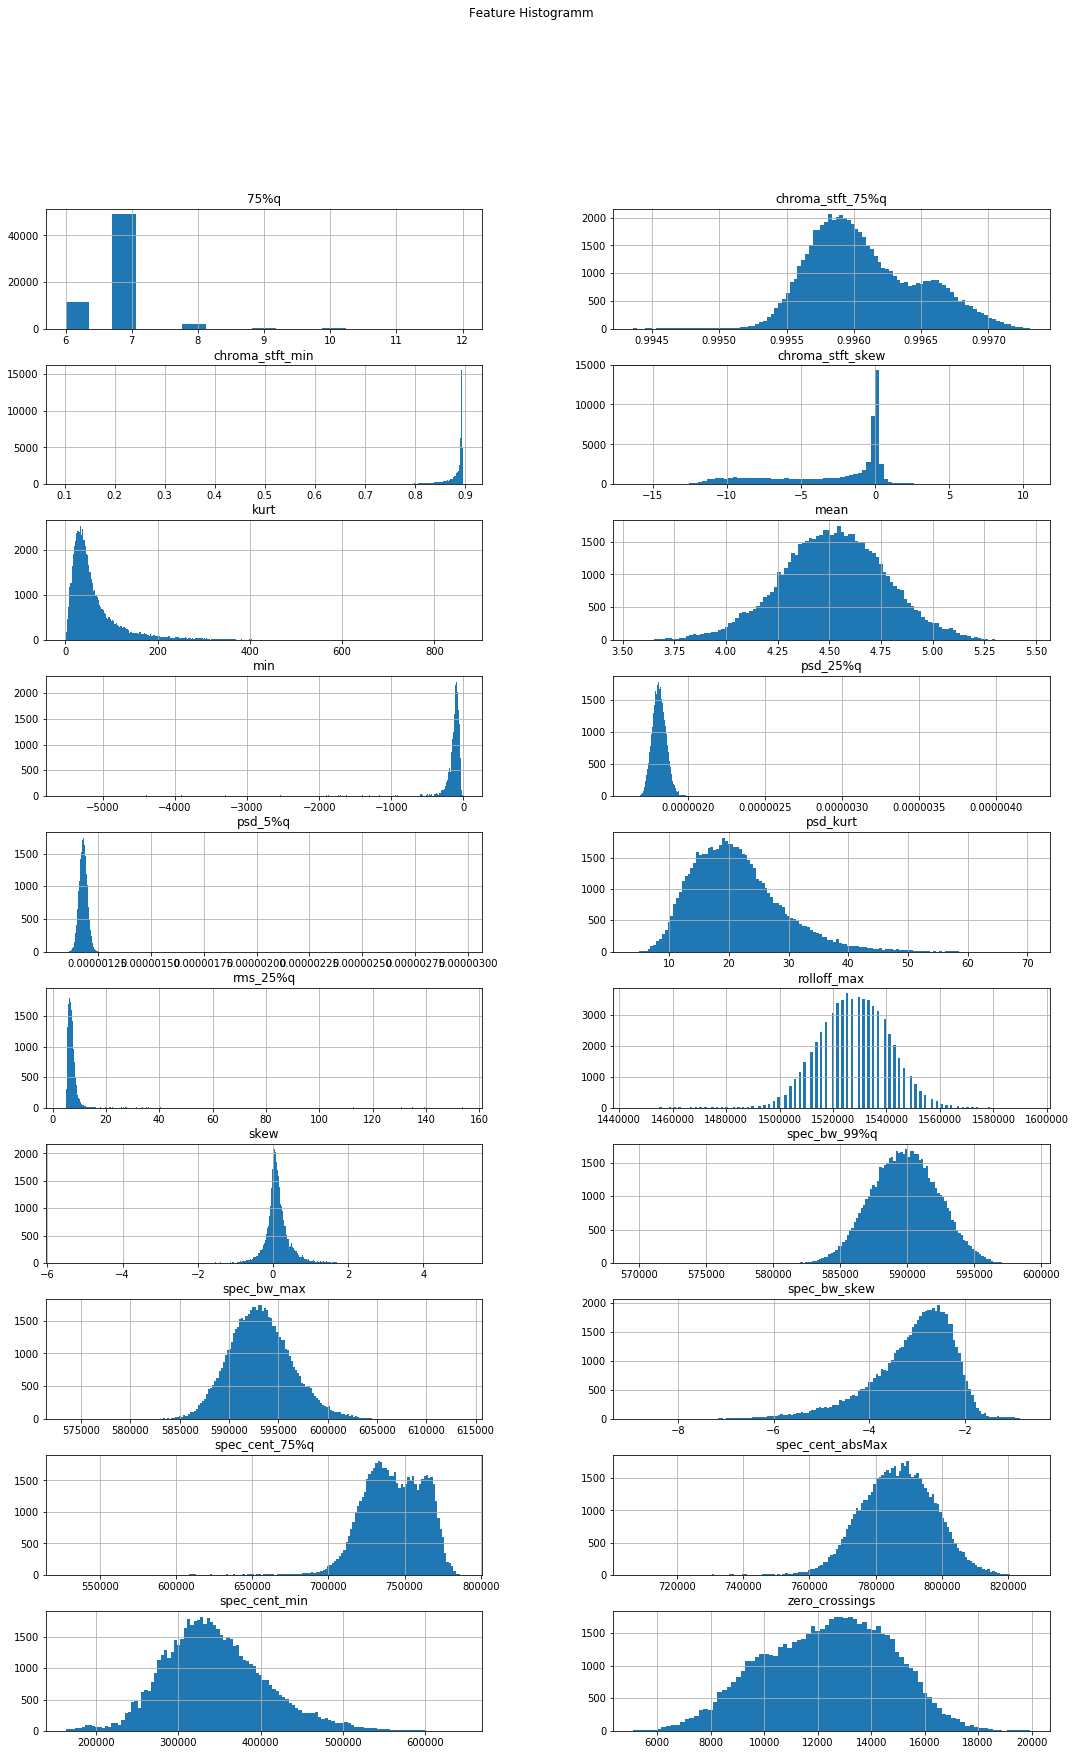

In [8]:
axes = filtered_feature_data_imp_corr.hist(bins='auto', figsize=(18, 28), layout=(10, 2))
plt.suptitle("Feature Histogramm")

### Korrelationen zwischen den Features (CatBoost)

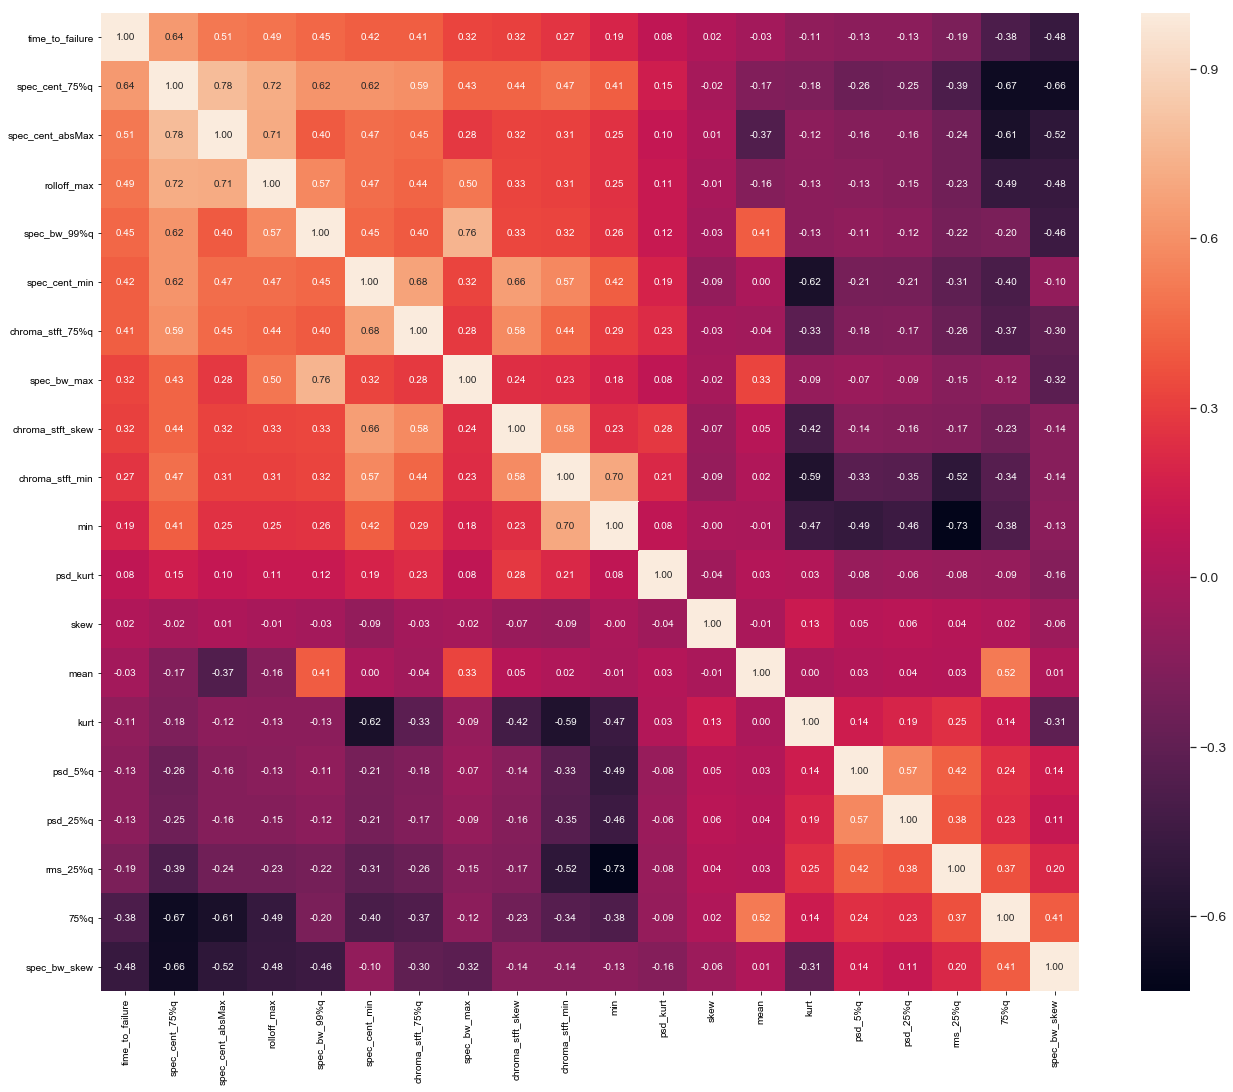

In [9]:
filtered_feature_data_corr_bereinigt = filtered_feature_data_imp_corr
filtered_feature_data_corr_bereinigt['time_to_failure'] = time_to_failure
corr = filtered_feature_data_corr_bereinigt.corr()

k = 20
plt.subplots(figsize=(22,18))
cols = corr.nlargest(k, 'time_to_failure')['time_to_failure'].index
cm = np.corrcoef(filtered_feature_data_corr_bereinigt[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Baseline Importance - Corr(0.8)

In [16]:
filter_Importence_Corr = ['spec_cent_75%q', 'mean', 'zero_crossings', 'skew', 'min', 'psd_kurt', 'spec_cent_min', 'kurt', 'chroma_stft_skew', 'spec_bw_skew', 'spec_cent_absMax', 'psd_25%q', 'spec_bw_99%q', 'psd_5%q', 'chroma_stft_75%q', '75%q', 'rolloff_max', 'spec_bw_max', 'chroma_stft_min', 'rms_25%q']

train_data = pd.read_csv(earthquake_daten+feature_62900_94)
train_data = shuffle(train_data, random_state=10)

feature_data = train_data.iloc[:,1:95]
time_to_failure = np.array(train_data.iloc[:,-1])
filtered_data = feature_data.filter(items=filter_Importence_Corr)

gbm0 = CatBoostRegressor(random_state=10, verbose = False)
modelfit(gbm0, filtered_data, time_to_failure,printFeatureImportance=False)


Model Report
MAE train data: 1.78
CV Score MAE: 
Mean -1.844477 
Std 0.01082148 
Min -1.862805 
Max -1.833487


## Baseline Test train_test_split 41934

In [50]:
gbm0 = CatBoostRegressor( random_state=10, verbose = False)
filter_ = ['spec_cent_75%q', 'mean', 'zero_crossings', 'skew', 'min', 'psd_kurt', 'spec_cent_min', 'kurt', 'chroma_stft_skew', 'spec_bw_skew', 'spec_cent_absMax', 'psd_25%q', 'spec_bw_99%q', 'psd_5%q', 'chroma_stft_75%q', '75%q', 'rolloff_max', 'spec_bw_max', 'chroma_stft_min', 'rms_25%q']

test_Model_with_41934_test_train_split(gbm0,filter_)

MAE train / test data: 1.875


# Parameter Tuning 31 Features / 41934 rows

## Load data

In [3]:
train_data = pd.read_csv(earthquake_daten+feature_41934_94)
train_data = shuffle(train_data, random_state=10)


feature_data = train_data.iloc[:,1:95]
time_to_failure_tuning = np.array(train_data.iloc[:,-1])
# Erhalten aus dem Notebook Model_CatBoost_94
items_to_filter = ['spec_cent_75%q', 'mean', 'rolloff_75%q', 'zero_crossings', 'spec_cent_95%q', 'skew', 'min', 'absMax', 'spec_bw_75%q', 'spec_cent_mean', 'max', 'spec_bw_25%q', 'spec_cent_std', 'psd_kurt', 'rolloff_25%q', 'spec_cent_absMean', 'psd_skew', 'spec_cent_min', 'spec_cent_absStd', 'rolloff_95%q']
filtered_feature_data_tuning = feature_data.filter(items=items_to_filter)    

In [27]:
parameters = {'depth':[1,2,3,4,5,6,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200]}

In [ ]:
#Quelle: https://setscholars.net/2019/02/19/how-to-find-optimal-parameters-for-catboost-using-gridsearchcv-for-regression-in-python/
model = CatBoostRegressor()
                
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(filtered_feature_data_tuning, time_to_failure_tuning)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
   
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n", grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n", grid.best_params_)
    
print("\n ========================================================")

In [23]:
parameters = {  'iterations':[250,100,500,1000],
                 'l2_leaf_reg':[3,1,5,10,100]
         }

In [24]:
depth=6
learning_rate=0.01

In [28]:
#Quelle: https://setscholars.net/2019/02/19/how-to-find-optimal-parameters-for-catboost-using-gridsearchcv-for-regression-in-python/
model = CatBoostRegressor(
                            depth=depth,
                            learning_rate=learning_rate,
                            iterations=1000,
                            l2_leaf_reg=10,
                            border_count=20,
                            verbose=False)
                
grid = GridSearchCV(estimator=model, param_grid = parameters, scoring='neg_mean_absolute_error', cv = 5, n_jobs=-1)
grid.fit(filtered_feature_data_tuning, time_to_failure_tuning)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
   
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n", grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n", grid.best_params_)
    
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 -2.0521954524757273

 The best parameters across ALL searched params:
 {'border_count': 20, 'ctr_border_count': 50}



## Validate (crossvalidation) tuned Model with 41934 rows

In [34]:
train_data = pd.read_csv(earthquake_daten+feature_41934_94)
train_data = shuffle(train_data, random_state=10)

feature_data = train_data.iloc[:,1:95]
time_to_failure_validation = np.array(train_data.iloc[:,-1])

items_to_filter = ['spec_cent_75%q', 'rolloff_75%q', 'zero_crossings', 'skew', 'mean', 'min', 'spec_cent_95%q', 'spec_bw_75%q', 'chroma_stft_75%q', 'spec_bw_25%q', 'spec_cent_min', 'chroma_stft_std', 'psd_kurt', 'spec_cent_99%q', 'max', 'spec_bw_max', 'psd_skew', 'spec_bw_95%q', 'absMax', 'spec_bw_99%q']
filtered_feature_data_validation = feature_data.filter(items=items_to_filter)

In [35]:
 
    CatBoostRegressor(         depth=depth,
                            learning_rate=learning_rate,
                            iterations=1000,
                            l2_leaf_reg=10,
                            border_count=20,
                            verbose=False)

In [36]:
modelfit(model,  filtered_feature_data_validation, time_to_failure_validation,performCV=True,printFeatureImportance=False)


Model Report
MAE train data: 1.964
CV Score MAE: 
Mean -1.989104 
Std 0.008877387 
Min -2.000448 
Max -1.977356


In [9]:
depth=6
learning_rate=0.01
mod = CatBoostRegressor(         depth=depth,
                            learning_rate=learning_rate,
                            iterations=1000,
                            l2_leaf_reg=10,
                            border_count=20,
                            verbose=False)

test_Model_with_41934_test_train_split(mod,['spec_cent_75%q', 'rolloff_75%q', 'zero_crossings', 'skew', 'mean', 'min', 'spec_cent_95%q', 'spec_bw_75%q', 'chroma_stft_75%q', 'spec_bw_25%q', 'spec_cent_min', 'chroma_stft_std', 'psd_kurt', 'spec_cent_99%q', 'max', 'spec_bw_max', 'psd_skew', 'spec_bw_95%q', 'absMax', 'spec_bw_99%q'])

MAE train / test data: 1.984


# Save Model

In [1]:
timestamp = time.time()
#https://catboost.ai/docs/concepts/python-reference_catboost_save_model.html
m.save_model(cat_boost_model+str(timestamp), 
           format="cbm", 
           export_parameters=None,
           pool=None)

NameError: name 'time' is not defined

# Train Model with 41934 

## Load Data

In [18]:
train_data = pd.read_csv(earthquake_daten+feature_62900_94)
train_data = shuffle(train_data, random_state=10)

feature_data = train_data.iloc[:,1:95]
time_to_failure = np.array(train_data.iloc[:,-1])

## Filter Data

In [19]:
feature_filter = ['spec_cent_75%q', 'mean', 'zero_crossings', 'skew', 'min', 'psd_kurt', 'spec_cent_min', 'kurt', 'chroma_stft_skew', 'spec_bw_skew', 'spec_cent_absMax', 'psd_25%q', 'spec_bw_99%q', 'psd_5%q', 'chroma_stft_75%q', '75%q', 'rolloff_max', 'spec_bw_max', 'chroma_stft_min', 'rms_25%q', 'rms_min', 'rms_5%q', 'psd_1%q', 'psd_min', '25%q', 'chroma_stft_5%q', 'rms_skew', 'rms_kurt', 'chroma_stft_99%q', 'chroma_stft_95%q', 'chroma_stft_max']
filtered_feature_for_submission = feature_data.filter(items=feature_filter)  

In [20]:
filtered_feature_for_submission.head()

,spec_cent_75%q,mean,zero_crossings,skew,min,psd_kurt,spec_cent_min,kurt,chroma_stft_skew,spec_bw_skew,...,rms_5%q,psd_1%q,psd_min,25%q,chroma_stft_5%q,rms_skew,rms_kurt,chroma_stft_99%q,chroma_stft_95%q,chroma_stft_max
37967,767046.5000449980,4.4180866667,10310,-0.0116904443,-40,20.2386676547,454310.2741050014,11.6978881791,-0.0650535917,-3.8695025887,...,5.4195528716,0.0000008463,0.0000005371,2.0,0.8995493771,-0.0302313399,-1.0412748894,1.0,1.0,1.0
1893,750571.2352972794,4.5964400000,11454,0.2990089884,-108,15.4682623660,359380.5329465302,45.9107225553,-2.1492101375,-2.7577649802,...,6.3028210615,0.0000011265,0.0000005348,2.0,0.8996885223,-0.0379640684,-1.6263808952,1.0,1.0,1.0
3781,736974.1028895653,4.6369733333,11995,0.7158172851,-145,20.3196849660,309037.4962889477,92.4776299463,-9.1747068112,-3.3006488507,...,6.7407144629,0.0000011437,0.0000005725,2.0,0.8994979162,-0.0878127813,-1.5542734632,1.0,1.0,1.0
11378,761154.2422456095,4.5401800000,9984,0.2635137430,-83,23.6180947135,361688.6971046638,48.8413550298,0.1853712382,-4.9412284512,...,5.8438075292,0.0000008901,0.0000005752,3.0,0.8995953723,-0.0241912844,-1.0706358978,1.0,1.0,1.0
54707,738928.9979114756,4.5912133333,12305,0.1968292822,-103,21.2559879281,334797.5728655917,39.2116176624,0.0007672706,-2.7649072414,...,7.1012236105,0.0000009802,0.0000005463,2.0,0.8996547771,-0.1123906260,1.1395631892,1.0,1.0,1.0


## Train Model

In [21]:
gbm0 = CatBoostRegressor(random_state=10, verbose = False)
gbm0.fit(filtered_feature_for_submission,time_to_failure)

In [26]:
gbm0 = CatBoostRegressor(iterations=10000,
                         loss_function = 'MAE',
                         eval_metric = 'MAE',
                        depth=6, 
                        learning_rate=0.1,
                        od_type = 'Iter',
                        od_wait = 100, 
                        logging_level='Silent')


In [ ]:
modelfit(gbm0,  filtered_feature_data_validation, time_to_failure_validation,performCV=True,printFeatureImportance=False)

In [27]:
test_Model_with_41934_test_train_split(gbm0)

MAE train / test data: 1.483


In [28]:
test_Model_with_41934_test_train_split(gbm0,['spec_cent_75%q', 'mean', 'zero_crossings', 'skew', 'min', 'psd_kurt', 'spec_cent_min', 'kurt', 'chroma_stft_skew', 'spec_bw_skew', 'spec_cent_absMax', 'psd_25%q', 'spec_bw_99%q', 'psd_5%q', 'chroma_stft_75%q', '75%q', 'rolloff_max', 'spec_bw_max', 'chroma_stft_min', 'rms_25%q'])

MAE train / test data: 1.603


# Submission

In [13]:
train_data = pd.read_csv(earthquake_daten+feature_41934_94)
train_data = shuffle(train_data, random_state=10)

feature_data = train_data.iloc[:,1:95]
time_to_failure = np.array(train_data.iloc[:,-1])

In [15]:
#feature_filter_Order_Corr = ['spec_cent_75%q', 'mean', 'zero_crossings', 'skew', 'min', 'psd_kurt', 'spec_cent_min', 'kurt', 'chroma_stft_skew', 'spec_bw_skew', 'spec_cent_absMax', 'psd_25%q', 'spec_bw_99%q', 'psd_5%q', 'chroma_stft_75%q', '75%q', 'rolloff_max', 'spec_bw_max', 'chroma_stft_min', 'rms_25%q', 'rms_min', 'rms_5%q', 'psd_1%q', 'psd_min', '25%q', 'chroma_stft_5%q', 'rms_skew', 'rms_kurt', 'chroma_stft_99%q', 'chroma_stft_95%q', 'chroma_stft_max']
feature_filter_order = ['spec_cent_75%q', 'mean', 'rolloff_75%q', 'zero_crossings', 'spec_cent_95%q', 'skew', 'min', 'absMax', 'spec_bw_75%q', 'spec_cent_mean', 'max', 'spec_bw_25%q', 'spec_cent_std', 'psd_kurt', 'rolloff_25%q', 'spec_cent_absMean', 'psd_skew', 'spec_cent_min', 'spec_cent_absStd', 'rolloff_95%q', 'kurt', 'psd_75%q', 'rolloff_min', 'chroma_stft_mean', 'chroma_stft_std', 'rolloff_99%q', 'spec_cent_skew', 'spec_cent_25%q', 'spec_cent_max', 'spec_cent_99%q', 'chroma_stft_skew']

filtered_feature = feature_data.filter(items=feature_filter_order)   

In [16]:
filtered_feature.shape

(41934, 31)

In [18]:
gbm0 = CatBoostRegressor(iterations=10000,
                        depth=6, 
                        border_count=120,
                        learning_rate=0.012,
                        eval_metric='RMSE', 
                        od_type = 'Iter',
                        od_wait = 100, 
                        logging_level='Silent')

pool = Pool(filtered_feature,time_to_failure)
gbm0.fit(pool)

## Load Kaggle Test Files

In [19]:
kaggle_Test_Features_95 ='''C:/studium/studium/CAS_PML/Projekt_Arbeit/earthquake/Daten/earthquake_data/Kaggle_Test_Features_94.csv'''
test_data_kaggle = pd.read_csv(kaggle_Test_Features_95)

In [20]:
filter_=feature_filter_order
kaggle_filtered_feature = test_data_kaggle.filter(items=filter_)  

In [22]:
filtered_feature.head()

,spec_cent_75%q,mean,rolloff_75%q,zero_crossings,spec_cent_95%q,skew,min,absMax,spec_bw_75%q,spec_cent_mean,...,psd_75%q,rolloff_min,chroma_stft_mean,chroma_stft_std,rolloff_99%q,spec_cent_skew,spec_cent_25%q,spec_cent_max,spec_cent_99%q,chroma_stft_skew
36299,763689.8571895401,4.2157000000,1488281.250,13029,780539.9226828680,0.0148074398,-59,59,579519.4463965117,719811.7027968791,...,0.0000049718,1031250.000,0.9719436451,0.0315092741,1525390.6250,-1.7691481239,698789.3479278071,795523.3059471993,790826.8231190884,-0.0636674429
34517,749433.5311476591,4.4256000000,1472656.250,12942,770312.5115677479,0.0192363783,-48,64,578561.9171971774,698238.4568975221,...,0.0000053424,787109.375,0.9719299058,0.0315058870,1516601.5625,-1.3529507524,659285.7541232853,789024.2251938345,784702.0677270021,0.1514484030
14725,772578.5286350942,4.3481600000,1496093.750,10532,786524.1535340956,0.1958436645,-79,96,582320.4835789107,734899.6641601855,...,0.0000049167,748046.875,0.9718954162,0.0315237121,1534179.6875,-2.7951928354,733657.9902166845,812040.2239280045,802938.8600376457,-0.0831450633
546,772108.4018194481,4.5943600000,1498046.875,8258,783467.0087639566,-0.0593713029,-64,68,583500.7633918680,744848.3952576519,...,0.0000048324,957031.250,0.9719317214,0.0315152126,1532226.5625,-2.9806144003,745842.8532972670,808136.5163239890,790360.2124659059,-0.0489719707
8796,727119.9436315143,4.6222533333,1457031.250,13528,756712.8566328911,1.7743429672,-489,489,577396.0642789364,655808.1640903439,...,0.0000055347,310546.875,0.9686253447,0.0452100588,1522460.9375,-1.6431879799,611347.7026904519,774303.2695348263,772020.3569742452,-10.6770216763


In [21]:
kaggle_filtered_feature.head()


,spec_cent_75%q,mean,rolloff_75%q,zero_crossings,spec_cent_95%q,skew,min,absMax,spec_bw_75%q,spec_cent_mean,...,psd_75%q,rolloff_min,chroma_stft_mean,chroma_stft_std,rolloff_99%q,spec_cent_skew,spec_cent_25%q,spec_cent_max,spec_cent_99%q,chroma_stft_skew
0,735762.7967444067,4.4917800000,1457031.250,13506,758035.0684231048,0.3279076353,-75,115,575288.1683843500,677497.5901003524,...,0.0000054010,533203.125,0.9718659281,0.0315558554,1503906.2500,-1.4481700230,643912.0615304965,777314.9133251708,769008.3705237161,-2.3987983495
1,745850.7277137799,4.1711533333,1472656.250,14722,769960.4054066588,0.2957078592,-140,152,578095.2740188292,681882.8844186453,...,0.0000050889,390625.000,0.9717783015,0.0316042863,1527343.7500,-1.6929088334,654465.1979522504,796514.6119982691,782278.1729313864,-4.2343973621
2,743207.9477459865,4.6102600000,1468750.000,11810,764592.0989041991,0.4286882883,-193,248,578788.2750316270,681781.4117541387,...,0.0000050401,333984.375,0.9715041339,0.0319754309,1512695.3125,-1.9370734550,657710.7773481928,782874.9821143645,780850.4697825569,-11.0669941823
3,765550.5877938962,4.5314733333,1490234.375,10136,780293.4622114317,0.0618893629,-93,93,581364.9702111626,723898.9538385712,...,0.0000052371,662109.375,0.9719249352,0.0315117356,1525390.6250,-2.2574770120,720297.6866233116,793191.6118377681,788992.4420219802,0.1794251694
4,756397.1732256257,4.1283400000,1484375.000,14468,774653.0496395873,0.0738983508,-147,177,579016.5541949138,694579.5816548213,...,0.0000050372,449218.750,0.9718653520,0.0315263114,1514648.4375,-1.7403775800,660431.9966966585,789818.3651201478,786305.2913100236,0.1336653534


In [24]:
submission = pd.DataFrame()
submission['time_to_failure'] = gbm0.predict(kaggle_filtered_feature)
submission['seg_id'] = test_data_kaggle.loc[:,'seg_id']
submission = submission[['seg_id', 'time_to_failure']]
submission.to_csv(earthquake_daten+'model/catboost/submission_catBoost_41934_31_order.csv',index=False)

 # Model explanation

Quelle: https://github.com/slundberg/shap

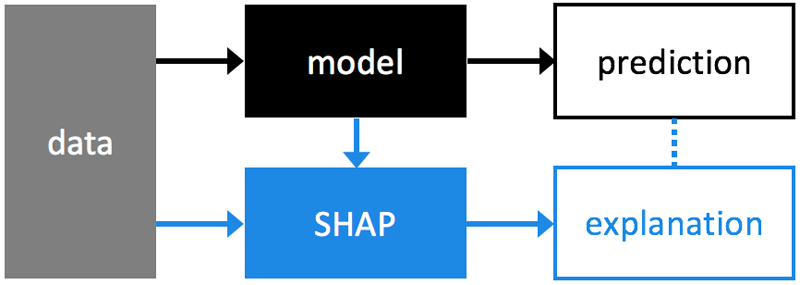